README

The only dependencies that are required are the libraries specified in the code block below.

In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

import tensorboard
import matplotlib.pyplot as plt

import numpy as np
import os
from google.colab import files

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize training images
train_images = train_images / 255.0

# Reshape data
# Input has a depth of one(gray scale image)
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)


In [ ]:
# Question 1
# Model 1
# CNN where the number of filters in each layer increases as the depth of the network grows

# Create CNN Model
cnn_model_one = tf.keras.models.Sequential()

# Add 5 convolutional layers
cnn_model_one.add(tf.keras.layers.Conv2D(4, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_one.add(tf.keras.layers.Conv2D(8, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_one.add(tf.keras.layers.Conv2D(16,(3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_one.add(tf.keras.layers.Conv2D(32,(3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_one.add(tf.keras.layers.Conv2D(64,(3,3), strides = (2, 2), padding='same', activation='relu'))

# Add flatten layer
# Add fully connected layers
cnn_model_one.add(tf.keras.layers.Flatten())
cnn_model_one.add(tf.keras.layers.Dense(256))
cnn_model_one.add(tf.keras.layers.Activation('relu'))
cnn_model_one.add(tf.keras.layers.Dense(10))
cnn_model_one.add(tf.keras.layers.Activation('softmax'))

# Create Optimizer and Learning Rate
learning_rate = .01
optimizer = Adam(learning_rate=learning_rate)

# Compile and build model
cnn_model_one.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
cnn_model_one.build(input_shape=(1,28,28,1))

# Print Summary
cnn_model_one.summary()


In [4]:
# Define the Keras TensorBoard callback for model 1.
logdir="logs/question1/model1/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_model_one = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Model 1 Training and Testing

# Train the model
cnn_model_one.fit(
    x_train,
    train_labels,
    batch_size=256,
    epochs=3,
    callbacks=[tensorboard_callback_model_one])

# Evaluate
score = cnn_model_one.evaluate(x_test, test_labels, callbacks=[tensorboard_callback_model_one])
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
%tensorboard --logdir logs/question1/model1

In [ ]:
# Downloading log files
directory_to_zip = '/content/logs/question1/model1'
!zip -r /content/model1.zip $directory_to_zip
files.download('/content/model1.zip')

**Question 1(Network 1)**

For network one, each layer had more filters than the previous layer. The filters I chose from the first convolutional layer to the fifth convolutional layer are 4, 8, 16, 32, and 64. To choose the optimal combination of hyperparameters between the learning rate, optimizer, and batch size I decided to keep one hyperparameter constant. The hyperparameter that I initially chose to keep constant was the batch size as it is the least impactful compared to the other two hyper parameters. I kept the batch size at 512. I then tried 9 combinations. My learning rate was either .005, .01, or .05. My optimizer was either Adam, SGD, or RMSprop. SGD performed poorly with the three learning rates and only managed to crack above 50% test accuracy once which was at a learning rate of .05. Adam and RMSprop had comparable results except for the learning rate of .05 where Adam had a test accuracy of .6393 and RMSprop had a test accuracy of .1154. After first trying these 9 combinations of different learning rates and optimizers, I was getting the best results with the Adam optimizer with a learning rate of .01. I then held the learning rate of .01 and the optimizer(Adam) constant and experimented with different batch sizes. The batch sizes I chose were 64, 128, 256, 512, and 1024. The results were pretty similar between the different batch sizes however the batch size of 256 displayed the best results. It had a training accuracy of 0.9719 and a test accuracy of 0.9760. My final hyperparameters for network one ended up being .01 for the learning rate, 256 for the batch size, and Adam for the optimizer.

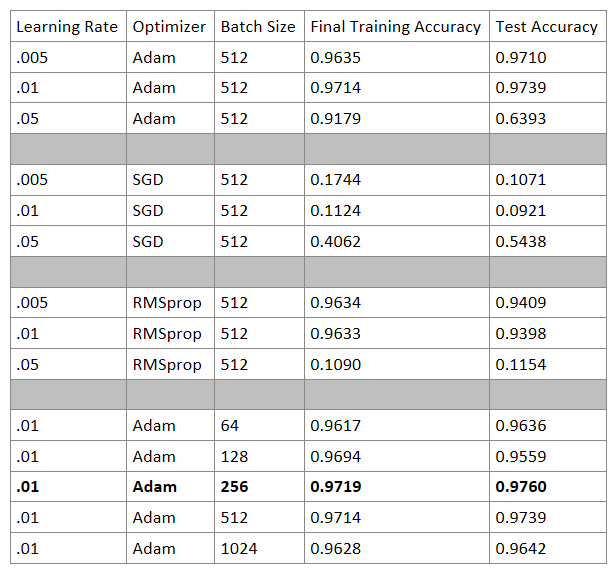

In [ ]:
# Question 1
# Model 2
# CNN where the number of filters in each layer decreases as the depth of the network grows

# Create CNN Model
cnn_model_two = tf.keras.models.Sequential()

# Add 5 convolutional layers
cnn_model_two.add(tf.keras.layers.Conv2D(64, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_two.add(tf.keras.layers.Conv2D(32, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_two.add(tf.keras.layers.Conv2D(16, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_two.add(tf.keras.layers.Conv2D(8, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_two.add(tf.keras.layers.Conv2D(4, (3,3), strides = (2, 2), padding='same', activation='relu'))

# Add flatten layer
# Add fully connected layers
cnn_model_two.add(tf.keras.layers.Flatten())
cnn_model_two.add(tf.keras.layers.Dense(256))
cnn_model_two.add(tf.keras.layers.Activation('relu'))
cnn_model_two.add(tf.keras.layers.Dense(10))
cnn_model_two.add(tf.keras.layers.Activation('softmax'))

# Create Optimizer and Learning Rate
learning_rate = .01
optimizer = Adam(learning_rate=learning_rate)

# Compile and build model
cnn_model_two.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
cnn_model_two.build(input_shape=(1,28,28,1))

# Print Summary
cnn_model_two.summary()


In [ ]:
# Define the Keras TensorBoard callback for model 2.
logdir="logs/question1/model2/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_model_two = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Model 2 Training and Testing

# Train the model
cnn_model_two.fit(
    x_train,
    train_labels,
    batch_size=128,
    epochs=3,
    callbacks=[tensorboard_callback_model_two])

# Evaluate
score = cnn_model_two.evaluate(x_test, test_labels, callbacks=[tensorboard_callback_model_two])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/question1/model2

In [ ]:
# Downloading log files
directory_to_zip = '/content/logs/question1/model2'
!zip -r /content/model2.zip $directory_to_zip
files.download('/content/model2.zip')

**Question 1(Network 2)**

For network two, each layer had less filters than the previous layer. The filters I chose from the first convolutional layer to the fifth convolutional layer are 64, 32, 16, 8, and 4. To choose the optimal combination of hyperparameters between the learning rate, optimizer, and batch size I decided to keep one hyperparameter constant. I essentially repeated the same process I did for the first model. The hyperparameter that I initially chose to keep constant was the batch size as it is the least impactful compared to the other two hyperparameters. I kept the batch size at 512. I then tried 9 combinations. My learning rate was either .005, .01, or .05. My optimizer was either Adam, SGD, or RMSprop. SGD again performed poorly with the three learning rates and only managed to get a best test accuracy of 0.21 which was with a learning rate of .05. Adam and RMSprop had comparable results for all three learning rates however Adam performed the best. After first trying these 9 combinations of different learning rates and optimizers, I was getting the best results with the Adam optimizer with a learning rate of .01. These were the same parameters that also had the best results with the first network. I then held the learning rate of .01 and the optimizer(Adam) constant and experimented with different batch sizes. The batch sizes I chose were 64, 128, 256, 512, and 1024. The results were, again, pretty similar between the different batch sizes however the batch size of 128 displayed the best results. It had a training accuracy of 0.9693 and a test accuracy of 0.9651. My final hyperparameters for network two ended up being .01 for the learning rate, 128 for the batch size, and Adam for the optimizer. Lastly, I noticed that compared to the models for network 1, the runtimes for the models of network 2 were a lot slower. This is strange cause network 2 had a lot less parameters than network 1.

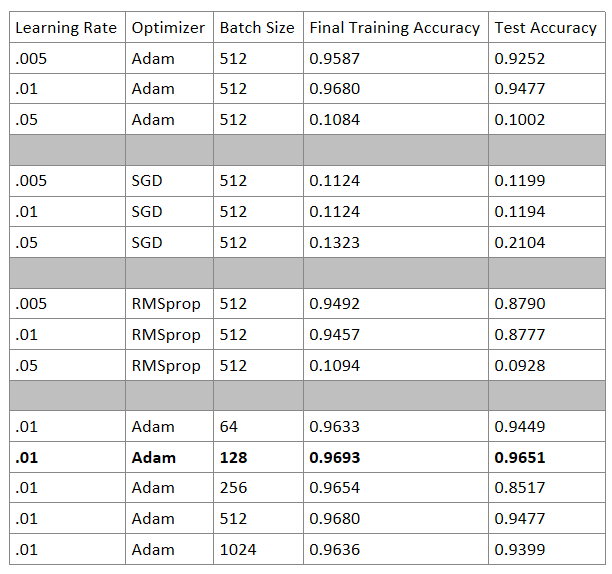


In [ ]:
# Question 1
# Model 3
# CNN where the number of filters will increase till the Lth layer and reduce afterwards

# Create CNN Model
cnn_model_three = tf.keras.models.Sequential()

# Add 5 convolutional layers
cnn_model_three.add(tf.keras.layers.Conv2D(4, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_three.add(tf.keras.layers.Conv2D(8, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_three.add(tf.keras.layers.Conv2D(16, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_three.add(tf.keras.layers.Conv2D(8, (3,3), strides = (2, 2), padding='same', activation='relu'))
cnn_model_three.add(tf.keras.layers.Conv2D(4, (3,3), strides = (2, 2), padding='same', activation='relu'))

# Add flatten layer
# Add fully connected layers
cnn_model_three.add(tf.keras.layers.Flatten())
cnn_model_three.add(tf.keras.layers.Dense(256))
cnn_model_three.add(tf.keras.layers.Activation('relu'))
cnn_model_three.add(tf.keras.layers.Dense(10))
cnn_model_three.add(tf.keras.layers.Activation('softmax'))

# Create Optimizer and Learning Rate
learning_rate = .005
optimizer = RMSprop(learning_rate=learning_rate)

# Compile and build model
cnn_model_three.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
cnn_model_three.build(input_shape=(1,28,28,1))

# Print Summary
cnn_model_three.summary()


In [ ]:
# Define the Keras TensorBoard callback for model 3.
logdir="logs/question1/model3/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_model_three = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Model 3 Training and Testing

# Train the model
cnn_model_three.fit(
    x_train,
    train_labels,
    batch_size=64,
    epochs=3,
    callbacks=[tensorboard_callback_model_three])

# Evaluate
score = cnn_model_three.evaluate(x_test, test_labels, callbacks=[tensorboard_callback_model_three])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/question1/model3

In [ ]:
# Downloading log files
directory_to_zip = '/content/logs/question1/model3'
!zip -r /content/model3.zip $directory_to_zip
files.download('/content/model3.zip')

**Question 1(Network 3)**

For network three, each layer had more filters than the previous layer till the Lth layer where it then reduces afterwards. The filters I chose from the first convolutional layer to the fifth convolutional layer are 4, 8, 16, 8, and 4. To choose the optimal combination of hyperparameters between the learning rate, optimizer, and batch size I decided to keep one hyperparameter constant. I repeated the same process I did for the first and second models. The hyperparameter that I initially chose to keep constant was the batch size as it is the least impactful compared to the other two hyperparameters. I kept the batch size at 512. I then tried 9 combinations. My learning rate was either .005, .01, or .05. My optimizer was either Adam, SGD, or RMSprop. SGD, similar to the previous two models, performed poorly with the three learning rates and only managed to get a best test accuracy of 0.1775 which was with a learning rate of .05. RMSprop performed better than Adam with learning rates of .005 and .01, but performed terribly with a learning rate of .05. After first trying these 9 combinations of different learning rates and optimizers, I was getting the best results with the RMSprop optimizer with a learning rate of .005. These were different parameters compared to networks 1 and 2. I then held the learning rate of .005 and the optimizer(RMSprop) constant and experimented with different batch sizes. The batch sizes I chose were 64, 128, 256, 512, and 1024. The results were pretty similar between the different batch sizes except for the batch size of 1024. It had a test accuracy of only 67% while the other batch sizes delivered test accuracy of above 90%. The batch size that performed the best was of size 64. It had a training accuracy of 0.9571 and a test accuracy of 0.9454. My final hyperparameters for network three ended up being .005 for the learning rate, 64 for the batch size, and RMSprop for the optimizer.

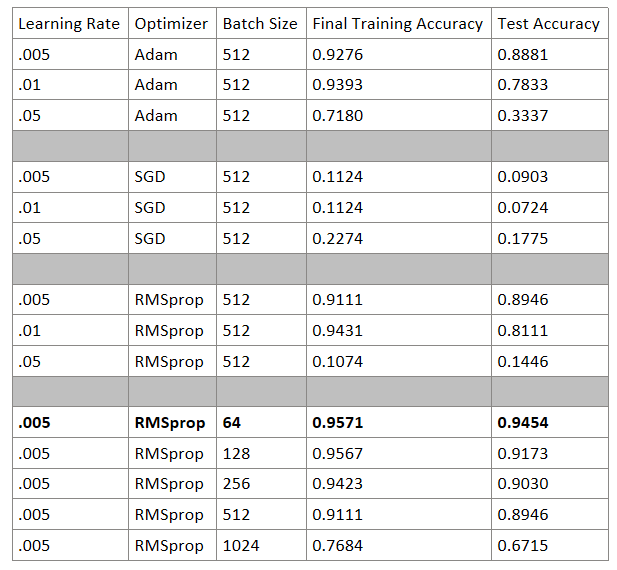

**Question 1(Summary)**

Overall, all three networks performed well on the test data. Networks 1, 2, and 3 had an accuracy of 0.9760, 0.9651, and 0.9454 respectively. However, all three networks performed poorly when using SGD as its optimizer. This may be due to SGD not having specific learning rates for each parameter like the RMSprop and Adam optimizers.

In [7]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize training images
train_images = train_images / 255.0

In [ ]:
# Question 2
# LeNet Convolutional Neural Network

# Create CNN Model
cnn_LeNet = tf.keras.models.Sequential()

# Add 7 layers plus a flatten layer
cnn_LeNet.add(tf.keras.layers.Conv2D(6, (5,5), strides = (1, 1), padding='same', activation='relu'))
cnn_LeNet.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_LeNet.add(tf.keras.layers.Conv2D(16, (5,5), strides = (1, 1), padding='same', activation='relu'))
cnn_LeNet.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_LeNet.add(tf.keras.layers.Conv2D(120, (5,5), strides = (1, 1), padding='same', activation='relu'))
cnn_LeNet.add(tf.keras.layers.Flatten())
cnn_LeNet.add(tf.keras.layers.Dense(84))
cnn_LeNet.add(tf.keras.layers.Activation('relu'))
cnn_LeNet.add(tf.keras.layers.Dense(10))
cnn_LeNet.add(tf.keras.layers.Activation('softmax'))

# Create Optimizer and Learning Rate
learning_rate = .001
optimizer = Adam(learning_rate=learning_rate)

# Compile and build model
cnn_LeNet.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
cnn_LeNet.build(input_shape=(1,32,32,3))

# Print Summary
cnn_LeNet.summary()



In [ ]:
# Define the Keras TensorBoard callback for LeNet.
logdir="logs/question2/LeNet/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_LeNet = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# LeNet Training and Testing

# Train the model
cnn_LeNet.fit(
    train_images,
    train_labels,
    batch_size=512,
    epochs=25,
    callbacks=[tensorboard_callback_LeNet])

# Evaluate
score = cnn_LeNet.evaluate(test_images, test_labels, callbacks=[tensorboard_callback_LeNet])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/question2/LeNet/

In [ ]:
# Downloading log files
directory_to_zip = '/content/logs/question2/LeNet'
!zip -r /content/LeNet.zip $directory_to_zip
files.download('/content/LeNet.zip')

**Question 2**

1. I experimented with four different learning rates to analyze the effect of the learning rate on the model's performance. I chose from the following learning rates: .0005, .001, .005, and .01. I kept the batch size constant at a size of 512 examples. The learning rate that performed best was .001 which had a training accuracy of .8759 and a test accuracy of .5567. As you can see from the table below changing the learning rate impact the model's performance greatly. It seems the lower the learning rate, the better the model performs.

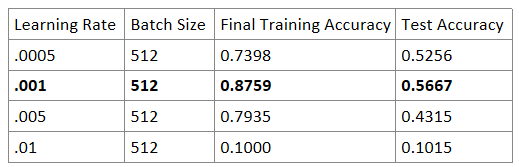

2. After identifying the learning rate which performed best(.001) I decided to keep the learning rate constant and then vary the batch size. I chose from 5 batch sizes: 64, 128, 256, 512, and 1024. These models roughly all performed the same on the testing data. However, the model with a batch size of 1024 had the lowest final training accuracy compared to the rest of the models. The model that performed the best was the model with a batch size of 512. It had a final training accuracy of 0.8759 and a test accuracy of 0.5667. It seems as you increase the batch size the variance between the training accuracy and test accuracy tends to decrease.

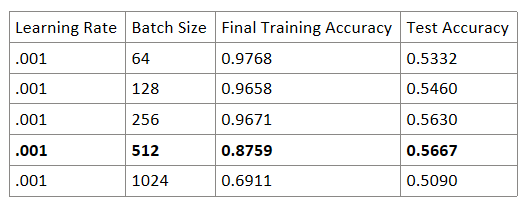




3. After trying different hyperparameters, the model that performed the best had a learning rate of .001 and a batch size of 512. It had a test accuracy of 0.5667.

In [ ]:
# Question 2
# Feed Forward Network

# Create Feed Forward Model
feed_forward_model = tf.keras.models.Sequential()

# Add 3 hidden layers and an output layer
feed_forward_model.add(tf.keras.layers.Flatten())
feed_forward_model.add(tf.keras.layers.Dense(6))
feed_forward_model.add(tf.keras.layers.Activation('relu'))
feed_forward_model.add(tf.keras.layers.Dense(16))
feed_forward_model.add(tf.keras.layers.Activation('relu'))
feed_forward_model.add(tf.keras.layers.Dense(120))
feed_forward_model.add(tf.keras.layers.Activation('relu'))
feed_forward_model.add(tf.keras.layers.Dense(10))
feed_forward_model.add(tf.keras.layers.Activation('softmax'))

# Create Optimizer and Learning Rate
learning_rate = .00005
optimizer = Adam(learning_rate=learning_rate)

# Compile and build model
feed_forward_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
feed_forward_model.build(input_shape=(1,32,32,3))

# Print Summary
feed_forward_model.summary()


In [ ]:
# Define the Keras TensorBoard callback for the Feed Forwared Network.
logdir="logs/question2/FeedForward/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_Feed_Forward = keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Feed Forward Training and Testing

# Train the model
feed_forward_model.fit(
    train_images,
    train_labels,
    batch_size=256,
    epochs=25,
    callbacks=[tensorboard_callback_Feed_Forward])

# Evaluate
score = feed_forward_model.evaluate(test_images, test_labels, callbacks=[tensorboard_callback_Feed_Forward])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/question2/FeedForward/

In [ ]:
# Downloading log files
directory_to_zip = '/content/logs/question2/FeedForward'
!zip -r /content/FeedForward.zip $directory_to_zip
files.download('/content/FeedForward.zip')

**Question 2**

4a. The feed forward model performed a lot worse than the LeNet model. The LeNet model had a best test accuracy of 0.5667 when it had .001 as its learning rate and 512 as its batch size. However, the feed forward model had a best test accuracy of 0.3334 when it had a learning rate of .00005 and a batch size of 256. When experimenting with the hyperparameters of the feed forward model, I first kept batch size constant. Once I found the best learning rate then I varied my batch size to find the best batch size.

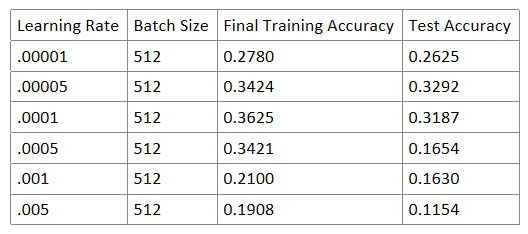

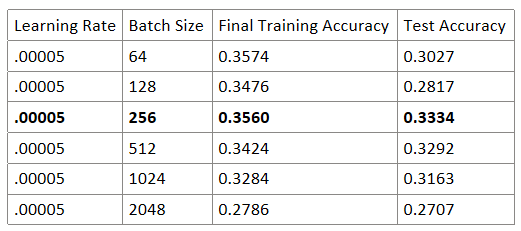



4b. The feed forward model only had 21800 parameters while the LeNet model had 697460. All the parameters in the feed forward model are worth it as even with all these parameters the model has a high bias and is underfitting. The model is not complex enough to learn the patterns in the training data.